# 可视化 eda_duration.csv 中的数据

1. 每一天求一个平均值
2. 按照日期画图

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 读取数据
data = pd.read_csv('data/eda_duration.csv', index_col=0)
data.index = pd.to_datetime(data.index)  # 将索引转换为日期时间格式

def ignore_range_mean(row):
    filtered_values = np.where((row < -0.001) | (row > 0.001), row, np.nan)
    return np.nanmean(filtered_values)

# 计算平均值，忽略范围在 -0.001 到 0.001 之间的值
data['平均值'] = data.iloc[:, 1:].apply(ignore_range_mean, axis=1)
# 计算10天的moving average
data['ma50'] = data['平均值'].rolling(10).mean()

data

/var/folders/gy/v9qc5w_13rd41qstcmbm_l840000gn/T/ipykernel_56867/552875097.py:12: RuntimeWarning: Mean of empty slice
  return np.nanmean(filtered_values)


,519985.OF.csv,261002.OF.csv,261102.OF.csv,110038.OF.csv,110037.OF.csv,202110.OF.csv,202108.OF.csv,161820.SZ.csv,050027.OF.csv,686868.OF.csv,...,021732.OF.csv,021696.OF.csv,020302.OF.csv,021463.OF.csv,021733.OF.csv,022051.OF.csv,021697.OF.csv,022071.OF.csv,平均值,ma50
2010-06-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2010-07-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2010-07-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2010-07-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2010-07-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,0.806380,2.080361,2.128193,2.387013,2.315426,2.455249,2.471103,0.0,1.402328,2.996064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.620121,2.377146
2024-08-27,0.692120,1.959012,2.045341,2.374425,2.293767,2.343451,2.337038,0.0,1.278216,2.805813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.509476,2.430560
2024-08-28,0.781486,1.955282,2.020714,2.450317,2.331912,2.311850,2.281558,0.0,1.271089,2.441888,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.421129,2.422430
2024-08-29,0.699935,2.239628,2.062098,2.323796,2.247338,2.335473,2.315373,0.0,1.281578,2.845507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.538310,2.516802


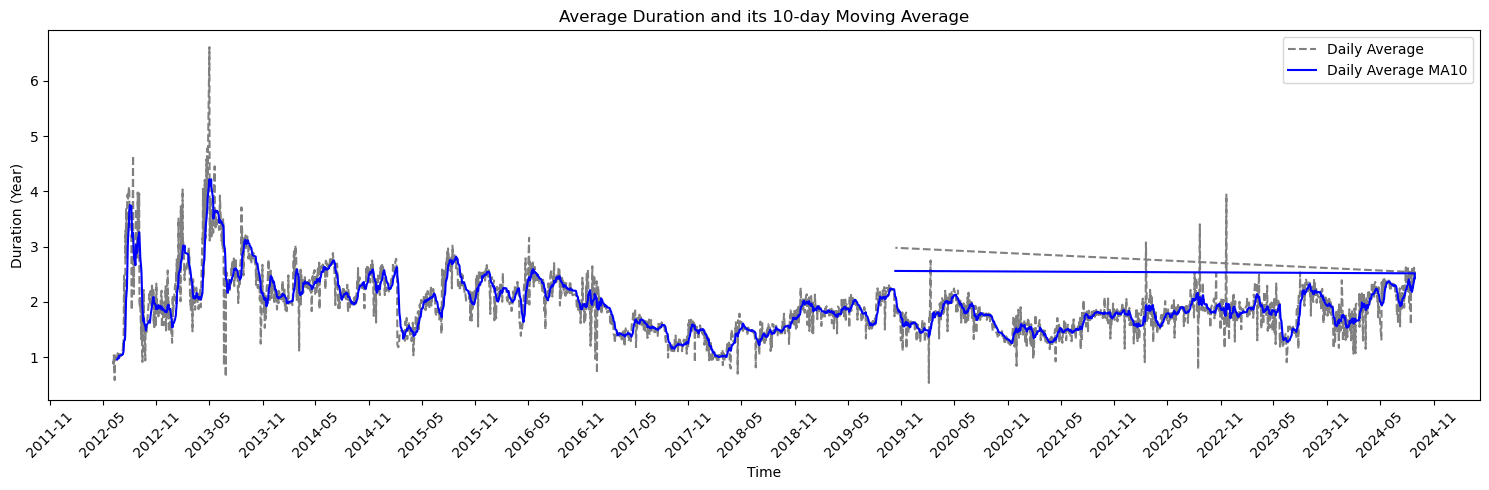

In [61]:
# 画图
plt.figure(figsize=(15, 5))
plt.plot(data['平均值'], label='Daily Average', color = 'grey', linestyle = '--')  # 平均值
plt.plot(data['ma50'], label='Daily Average MA10', color='blue')  # MA10


ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.legend()
plt.title('Average Duration and its 10-day Moving Average')
plt.xlabel('Time')
plt.ylabel('Duration (Year)') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()